In [4]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor


# Create the environment
# env = gym.make("LunarLander-v3", render_mode="rgb-array")
env = gym.make("CartPole-v1")
env = Monitor(env, filename="./logs")  # Saves logs in ./logs

# Create the model using DQN (Deep Q-Network)
model = DQN(
    "MlpPolicy",
    env,
    verbose=0,
    learning_rate=0.0005,
    buffer_size=50000,
    batch_size=64,
    target_update_interval=1000,
    train_freq=4,
    exploration_fraction=0.1,
    exploration_final_eps=0.02,
)

# Train the model for 100,000 steps
model.learn(total_timesteps=100000)

# Save the trained model
model.save("dqn_lunarlander")

# Load the trained model
model = DQN.load("dqn_lunarlander")

# Test the trained model
obs = env.reset()[0]
done = False
reward_sum = 0

while not done:
    action, _ = model.predict(obs)  # Choose action based on trained model
    obs, reward, done, _, info = env.step(action)  # Take a step in the environment
    # env.render()  # Render the environment
    reward_sum += reward

print(f'total reward: {reward_sum}')
env.close()

total reward: 195.0


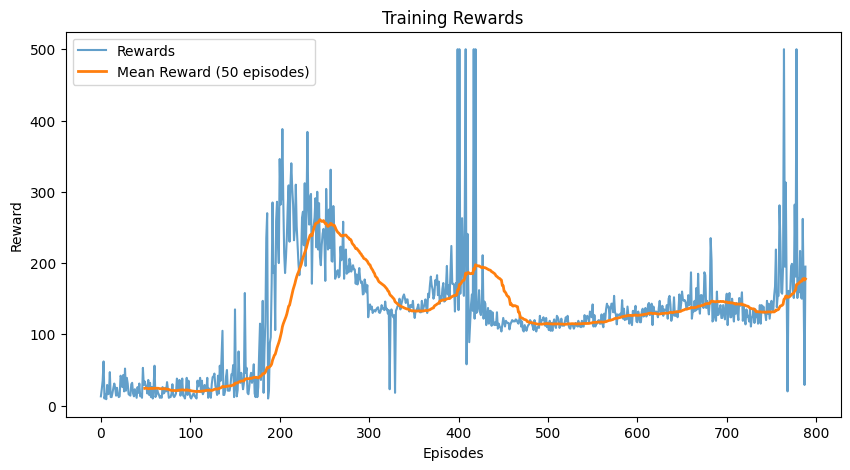

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the log data
log_df = pd.read_csv("./logs/monitor.csv", skiprows=1)  # Skip metadata row

# Extract data
rewards = log_df["r"]
episode_lengths = log_df["l"]

# Plot rewards over episodes
plt.figure(figsize=(10, 5))
plt.plot(rewards, label="Rewards", alpha=0.7)
plt.plot(rewards.rolling(window=50).mean(), label="Mean Reward (50 episodes)", linewidth=2)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.title("Training Rewards")
plt.show()
